## **2.4 Relationer**


### **2.4.1 Angiv udvælgelseskriterier**

**Trin 1:**

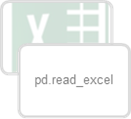

Vi henter database med relationer over kommuner og fylker, som excel format

```
fylkedata=pd.read_excel("https://www.kartverket.no/globalassets/til-lands/kommunereform/fylker-kommuner-2019-2020-alle.xlsx")
```


In [ ]:
#@title database med relationer over kommuner og fylker
import pandas as pd
fylkedata=pd.read_excel("https://www.kartverket.no/globalassets/til-lands/kommunereform/fylker-kommuner-2019-2020-alle.xlsx")



**Trin 2 & 3**

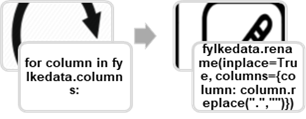



Vi omnavngiver alle kolonner

```
for column in fylkedata.columns:
```

De nye kolonnenavn har ikke "." i navnet, og er lettere at håndtere
```
  fylkedata.rename(inplace=True, columns={column: column.replace(".","")})
```



In [ ]:
#@title omnavngiv kolonner
for column in fylkedata.columns:
  fylkedata.rename(inplace=True, columns={column: column.replace(".","")})

fylkedata

,Fylkesnr 2019,Fylkesnavn 2019,Kommunenr 2019,Kommunenavn 2019,Fylkesnr 2020,Fylkesnavn 2020,Kommunenr 2020,Kommunenavn 2020
0,1,ØSTFOLD,101,HALDEN,30,VIKEN,3001,HALDEN
1,1,ØSTFOLD,104,MOSS,30,VIKEN,3002,MOSS
2,1,ØSTFOLD,105,SARPSBORG,30,VIKEN,3003,SARPSBORG
3,1,ØSTFOLD,106,FREDRIKSTAD,30,VIKEN,3004,FREDRIKSTAD
4,1,ØSTFOLD,111,HVALER,30,VIKEN,3011,HVALER
...,...,...,...,...,...,...,...,...
420,50,TRØNDELAG,5051,NÆRØY,50,TRØNDELAG,5060,NÆRØYSUND
421,50,TRØNDELAG,5052,LEKA,50,TRØNDELAG,5052,LEKA
422,50,TRØNDELAG,5053,INDERØY,50,TRØNDELAG,5053,INDERØY
423,50,TRØNDELAG,5054,INDRE FOSEN,50,TRØNDELAG,5054,INDRE FOSEN


**Trin 4:**

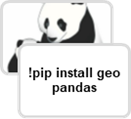

Dernest installere vi geopandas:

```
!pip install geopandas
```



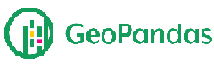

In [ ]:
#@title installere geopandas
!pip install geopandas

     |████████████████████████████████| 972kB 8.7MB/s 
     |████████████████████████████████| 6.5MB 15.1MB/s 
     |████████████████████████████████| 14.8MB 331kB/s 


**Trin 3:**

Tryk på nedstående link, for at download filen kommuner_komprimeret.json:

https://github.com/smistad/konverter-norgeskart-projeksjon/releases/download/v2020/kommuner_komprimert.json




**Trin 4:**


Last deretter opp filen "kommuner_komprimeret.json"


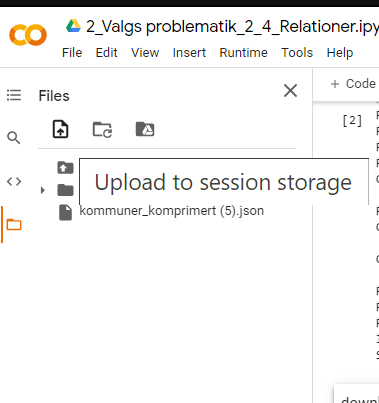

### **2.4.2 Vælg tabeller / filer af interesse**

**Trin 5:**


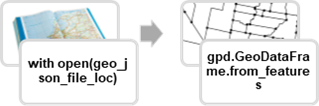

Importere relevante bibliotekker
```
import altair as alt
import pandas as pd
import geopandas as gpd
import json
```



Refere til og åbn op filen "kommuner_komprimert.json"
```
with open(geo_json_file_loc) as json_data:
    data = json.load(json_data)
```



Når filen er åben, hentes egenskaperne ud af filen, som en geopandas data struktur.

```
gdf = gpd.GeoDataFrame.from_features(data, crs = "str")
```




In [ ]:
#@title åbn som geopandas
import altair as alt
import pandas as pd
import geopandas as gpd
import json

geo_json_file_loc= "kommuner_komprimert.json"
with open(geo_json_file_loc) as json_data:
    data = json.load(json_data)
gdf = gpd.GeoDataFrame.from_features(data, crs = "str")
gdf.head(5)

,geometry,kommunenummer,objtype,lokalid,oppdateringsdato,datauttaksdato,versjonid,opphav,samiskforvaltningsomrade,datafangstdato,navnerom,navn
0,"POLYGON ((28.98103 70.40655, 29.05203 70.40828...",5405,Kommune,172718,None,20191220110340,4.1,None,False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,"[{'rekkefolge': '', 'sprak': 'nor', 'navn': 'V..."
1,"POLYGON ((4.54705 60.10405, 5.05288 60.14941, ...",4625,Kommune,172926,None,20191220110340,4.1,None,False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,"[{'rekkefolge': '', 'sprak': 'nor', 'navn': 'A..."
2,"POLYGON ((14.12563 67.94409, 14.78371 68.05597...",1848,Kommune,172744,None,20191220110340,4.1,None,False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,"[{'rekkefolge': '', 'sprak': 'nor', 'navn': 'S..."
3,"POLYGON ((15.07389 67.61695, 15.11372 67.63029...",1845,Kommune,172870,None,20191220110340,4.1,None,False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,"[{'rekkefolge': '', 'sprak': 'nor', 'navn': 'S..."
4,"POLYGON ((31.22260 70.64439, 31.54880 70.54528...",5404,Kommune,173014,None,20191220110340,4.1,None,False,None,http://skjema.geonorge.no/SOSI/produktspesifik...,"[{'rekkefolge': '', 'sprak': 'nor', 'navn': 'V..."


### **2.4.3 Vælg data i en tabel / fil**


**Trin 6:**

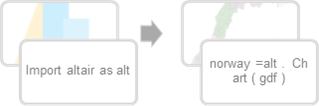

Vi importer altair bibliotekket

```
 import altair as alt
```

Nu kan vi vise dataene på et kort.

Dettte er princippet:
```
norway =alt.Chart(gdf).mark_geoshape ().
).encode().project()
```


Prøv at holde musen henover en lokation :)

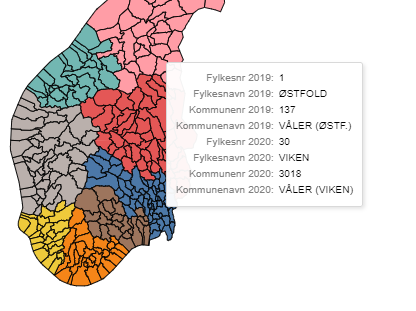

In [ ]:
#@title Kort
norway =alt .  Chart ( gdf ) .  mark_geoshape (stroke= "black").transform_lookup(
    lookup='kommunenummer',
    from_=alt.LookupData(fylkedata, 'Kommunenr 2020', list(fylkedata.columns)) #list(fylkedata.drop(['Type matvare','fylkesnummer'],axis=1).columns)
).encode(
  color='Fylkesnavn 2020:N',
  tooltip=['Fylkesnr 2019:N','Fylkesnavn 2019:N','Kommunenr 2019:N','Kommunenavn 2019:N','Fylkesnr 2020:N','Fylkesnavn 2020:N','Kommunenr 2020:N','Kommunenavn 2020:N']

).project( #projektere visning background+
    type= 'mercator', #vælg projektering
    scale= 1300, #skalere visning
    center= [12,65],  #centere visning på følgende gps koordinate
) .  properties (
     width = 800 ,
     height = 800
)
norway.save("relationer.html")

**Trin 7**

Hvordan kan vi skape verdi med datasettet? og for hvilken målgruppe?